In [ ]:
import pandas as pd
from tcrdist.repertoire import TCRrep
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, classification_report, confusion_matrix, davies_bouldin_score, fowlkes_mallows_score

warnings.simplefilter(action='ignore')
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed


In [5]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [6]:
# pd.set_option('display.max_colwidth', None)
# df[['meta']].head(3)

In [7]:
# pd.reset_option('display.max_colwidth')

# filtered_df = df[df['complex.id'] == 4]
# filtered_df.head(5)

In [8]:
df.info()
# df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [9]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows:",\
      duplicate_rows_df.shape)

Number of duplicated rows: (280, 14)


### Dropping duplicate rows - not dropping since tcrdist3 take care of duplicated values

In [10]:
# # Drop duplicate rows
# df=df.drop_duplicates()
# df.shape

### Dropping null value

In [11]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [12]:
df=df.dropna()
df.shape

(91550, 14)

**After dropping null value**


In [13]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


>**## Exploring the data ##**

In [14]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'

filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(2)



complex.id gene             cdr3     v.segm      j.segm      species  \
5309           0  TRB  CASSKLASTAGEQYF   TRBV2*01  TRBJ2-7*01  HomoSapiens   
5310           0  TRB     CASSGGQETQYF  TRBV14*01  TRBJ2-5*01  HomoSapiens   

              mhc.a           mhc.b mhc.class   antigen.epitope antigen.gene  \
5309  HLA-DRA*01:01  HLA-DRB1*11:01     MHCII  DRFYKTLRAEQASQEV          Gag   
5310  HLA-DRA*01:01  HLA-DRB1*01:01     MHCII   LNKIVRMYSPTSILD          Gag   

     antigen.species  vdjdb.score  \
5309           HIV-1            1   
5310           HIV-1            1   

                                                   meta  
5309  {"cell.subset": "CD8+", "clone.id": "", "donor...  
5310  {"cell.subset": "CD8+", "clone.id": "", "donor...

##  TCRDist3

In [15]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

## Installing tcrdist3 package ##

In [16]:
# pip install tcrdist3
# installing tcrdist3

In [17]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')

# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [18]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [19]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text dataset for tcrdist3

In [20]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [21]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'vdjdb.score']]

In [22]:
filter=df['vdjdb.score']==0
df=df[~filter]
df.head(3)

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species antigen.epitope antigen.gene antigen.species  vdjdb.score  
0  HomoSapiens        FLKEKGGL          Nef           HIV-1            2  
1  HomoSapiens        FLKEKGGL          Nef           HIV-1            2  
2  HomoSapiens        FLKEKGGL          Nef           HIV-1            2

In [23]:
df_copy=df.copy()

# Separating data set in to alpha and beta dataframe

# Alpha data frame

In [180]:

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [181]:
print("alpha chain:", df_alpha.shape)
print("beta chain:", df_beta.shape)

alpha chain: (3676, 10)
beta chain: (8418, 10)


In [182]:
df_alpha.reset_index(drop=True, inplace=True)

## Remove complex_id 0

In [183]:
#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]

df_alpha.shape

(2812, 10)

In [184]:
filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

df_beta.shape

(2860, 10)

Size of two chain are approximately the same now

In [185]:
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [186]:
df_alpha['species'].unique()

array(['HomoSapiens'], dtype=object)

In [187]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 3675
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1913 non-null   int64 
 1   gene             1913 non-null   object
 2   cdr3_a_aa        1913 non-null   object
 3   v_a_gene         1913 non-null   object
 4   j_a_gene         1913 non-null   object
 5   species          1913 non-null   object
 6   antigen.epitope  1913 non-null   object
 7   antigen.gene     1913 non-null   object
 8   antigen.species  1913 non-null   object
 9   vdjdb.score      1913 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 164.4+ KB


## Run TCRDist on human alpha gene dataset

In [188]:
tr = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

In [189]:
#tcrdist3 create a clone df that matches with the resulting distance matrix, 
#use this to concatnate the distance matrix with the corresponding epitope
tr.clone_df.shape
tr.clone_df.head(5)
clone_df_human_a=tr.clone_df

In [190]:
alpha_chain = tr.pw_alpha
alpha_chain.shape

(1913, 1913)

We need to scale the matrix before loading into tcrdist

In [35]:
# # Scaling the matrix

# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# alpha_scaled_df = std_scaler.fit_transform(alpha_chain)
# alpha_scaled_df

In [36]:
pca = PCA(n_components=50)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 50)

## Implementing TSNE

In [37]:

tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_homo)
tsne.kl_divergence_

0.6268314719200134

In [38]:
alpha_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
alpha_homo_dist_df.head(5)

A          B
0  -8.574254  13.752955
1  -1.828602  12.574696
2  23.641922 -16.621719
3  -8.574162  13.752790
4  -1.828590  12.574642

In [39]:
# combining the columns of the two dataframes
df_concat_a = pd.concat([alpha_homo_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

In [40]:
# Create a dataframe for plotting
plot_a_df_homo = df_concat_a[['antigen.species', 'A', 'B']]

In [41]:
plot_a_df_homo.head(5)

antigen.species          A          B
0           HIV-1  -8.574254  13.752955
1           HIV-1  -1.828602  12.574696
2           HIV-1  23.641922 -16.621719
3           HIV-1  -8.574162  13.752790
4           HIV-1  -1.828590  12.574642

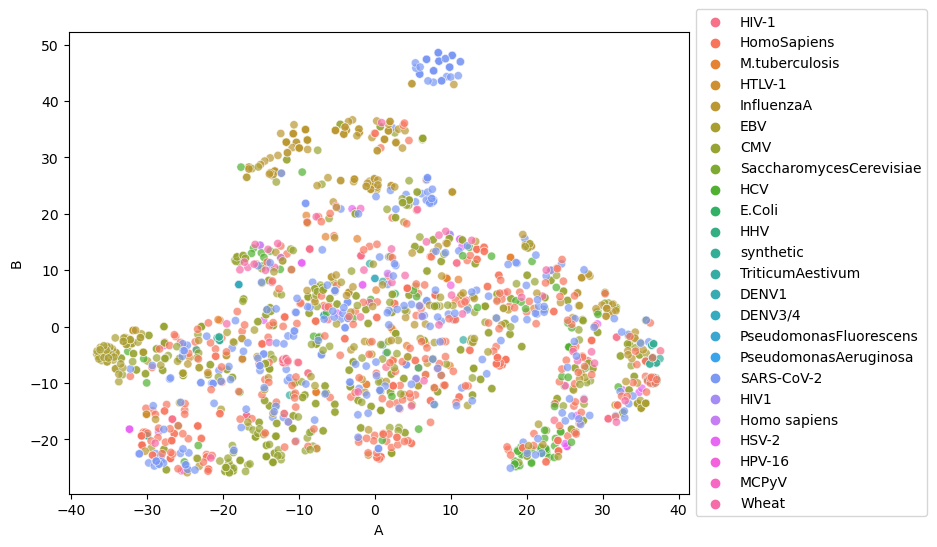

In [42]:
# Plotting using seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_homo, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [43]:

# fig_2d = px.scatter(
#     X_tsne, x=0, y=1,
#     color=plot_a_df_homo['antigen.species'], labels={'color': 'species'}
# )
# fig_2d.show()

## Implementing UMAP

In [44]:
# pip install umap-learn

In [45]:
pca_alpha_homo.shape

(1913, 50)

In [46]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_homo)

alpha_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a = pd.concat([alpha_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

plot_a_df_umap = df_concat_a[['antigen.species', 'A', 'B']]

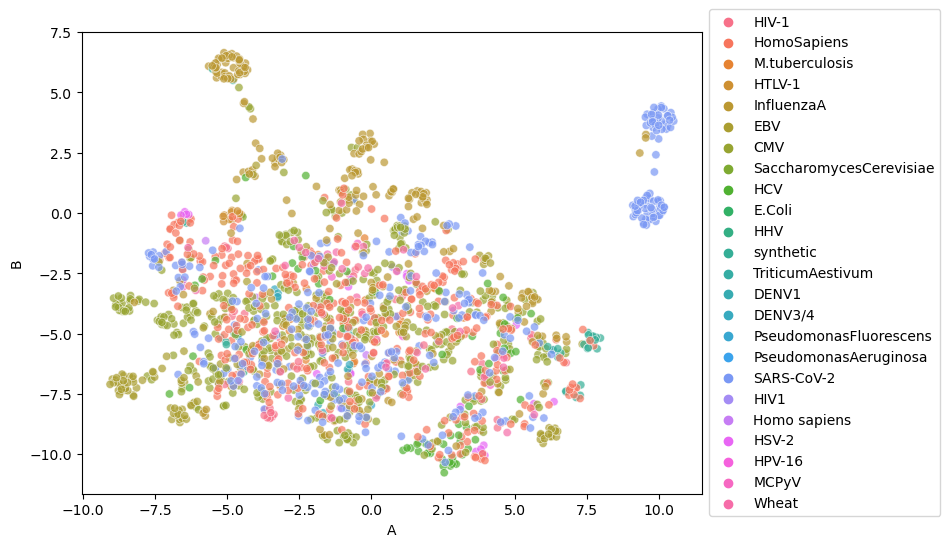

In [47]:
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Beta data frame - human

In [191]:
df_beta.head(5)

complex.id gene             cdr3_b_aa   v_b_gene    j_b_gene      species  \
1            1  TRB  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
4            2  TRB   CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
6            3  TRB  CASSYEPGQVSHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
8            4  TRB        CASSALASLNEQFF  TRBV14*01  TRBJ2-1*01  HomoSapiens   
10           5  TRB  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   

   antigen.epitope antigen.gene antigen.species  vdjdb.score  
1         FLKEKGGL          Nef           HIV-1            2  
4         FLKEKGGL          Nef           HIV-1            2  
6         FLKEKGGL          Nef           HIV-1            2  
8         FLKEKGGL          Nef           HIV-1            2  
10        FLKEQGGL          Nef           HIV-1            2

In [192]:
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [193]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1 to 92768
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1938 non-null   int64 
 1   gene             1938 non-null   object
 2   cdr3_b_aa        1938 non-null   object
 3   v_b_gene         1938 non-null   object
 4   j_b_gene         1938 non-null   object
 5   species          1938 non-null   object
 6   antigen.epitope  1938 non-null   object
 7   antigen.gene     1938 non-null   object
 8   antigen.species  1938 non-null   object
 9   vdjdb.score      1938 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 166.5+ KB


In [217]:
tr = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_human_b =tr.clone_df

In [196]:
beta_chain_human = tr.pw_beta
beta_chain_human.shape

(1938, 1938)

In [54]:
# Implement PCA
pca = PCA(n_components=50)
pca_beta_homo = pca.fit_transform(beta_chain_human)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(pca_beta_homo)


beta_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
beta_homo_dist_df.head(5)



# Combining the columns of the two dataframes
df_concat_b = pd.concat([beta_homo_dist_df.reset_index(drop=True),clone_df_b.reset_index(drop=True)], axis=1)

plot_b_df_homo = df_concat_b[['antigen.species', 'A', 'B']]

#PLotting beta chain
# fig_2d = px.scatter(
#     X_tsne, x=0, y=1,
#     color=plot_b_df_homo['antigen.species'], labels={'color': 'species'}
# )
# fig_2d.show()


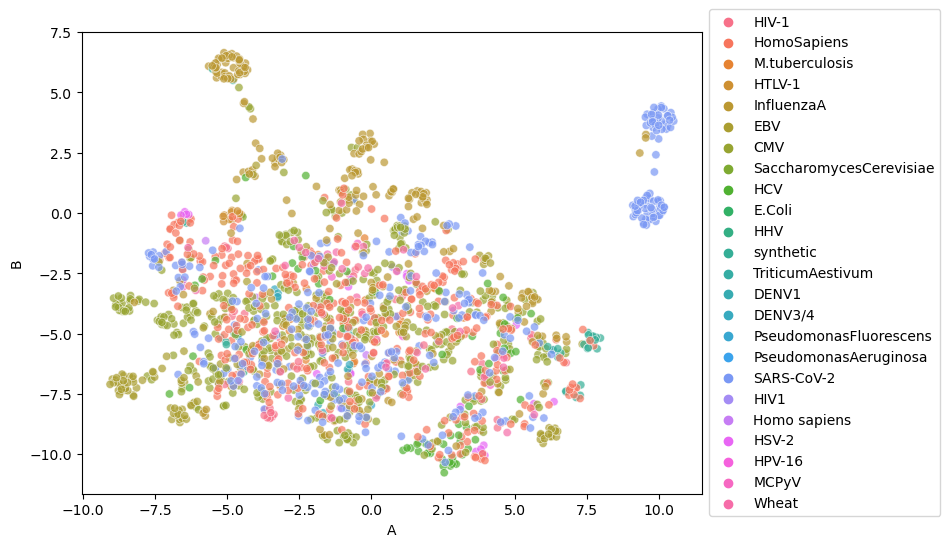

In [55]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_beta_homo)

beta_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b = pd.concat([beta_dist_df.reset_index(drop=True),clone_df_b.reset_index(drop=True)], axis=1)

plot_b_df_umap = df_concat_a[['antigen.species', 'A', 'B']]



# Plotting using seaborn

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_b_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Create combined data frame with alpha and beta chain

In [56]:
df_alpha = df_copy[df_copy['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df_copy[df_copy['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [57]:
df_alpha = df_alpha[df_alpha['complex.id'] != 0].reset_index(drop=True)
df_beta = df_beta[df_beta['complex.id'] != 0].reset_index(drop=True)

In [58]:
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')


In [59]:
df_merge.drop(['species_y'], axis=1, inplace=True)

In [60]:
df_merge.species_x.value_counts()

HomoSapiens    1840
MusMusculus     899
Name: species_x, dtype: int64

In [61]:
filter_cond=df_merge['species_x']=='MusMusculus'
df_merge = df_merge[~filter_cond]

df_merge.reset_index(drop=True, inplace=True)

# # Correct filter creation
# filter_condition = df_merge['species_x'] == 'MusMusculus'

# # Applying the filter with the negation to keep rows where 'species_x' is not 'MusMusculus'
# df_filtered = df_merge[~filter_condition]

# # Resetting the index of the filtered DataFrame
# df_filtered.reset_index(drop=True, inplace=True)

# # Checking the shape of the new DataFrame
# print(df_filtered.shape)


In [62]:
# Correct filter creation
filter_condition = df_merge['vdjdb.score_x'] == 1

# Applying the filter with the negation to keep rows where 'species_x' is not 'MusMusculus'
df_filtered = df_merge[~filter_condition]

# Resetting the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

# Checking the shape of the new DataFrame
print(df_filtered.shape)




(1156, 18)


In [63]:
df_filtered[['vdjdb.score_x']].value_counts()

vdjdb.score_x
3                615
2                541
dtype: int64

## Combined alpha and beta distance

In [64]:
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

# tr.clone_df.shape
# tr.clone_df.head(5)
clone_df_comb =tr.clone_df

In [65]:
tr.pw_alpha

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

In [66]:
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)
print("clone shape", clone_df_comb.shape)

alpha shape: (1840, 1840)
beta shape (1840, 1840)
clone shape (1840, 26)


In [67]:
print("alpha shape:", tr.pw_cdr3_b_aa.shape)
print("beta shape", tr.pw_cdr3_b_aa.shape)

alpha shape: (1840, 1840)
beta shape (1840, 1840)


In [69]:
# combined_pw_distance_homo = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa
combined_distance_mt_homo = tr.pw_beta + tr.pw_alpha
# combined_pw_distance_homo.shape

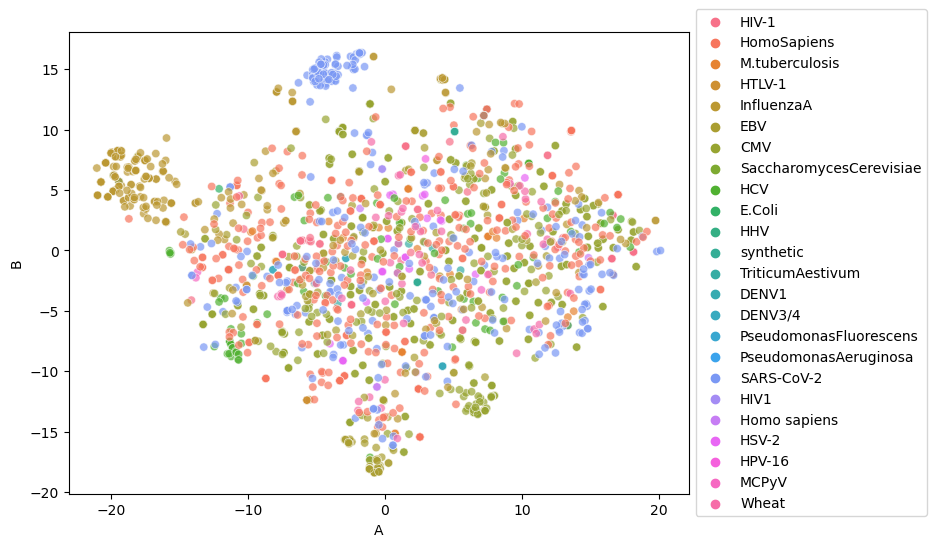

In [70]:
# Implement PCA
pca = PCA(n_components=50)
pca_combine_homo = pca.fit_transform(combined_distance_mt_homo)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=200)
X_tsne = tsne.fit_transform(pca_combine_homo)


combine_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
combine_homo_dist_df.head(5)


# Combining the columns of the two dataframes
df_concat_combine = pd.concat([combine_homo_dist_df.reset_index(drop=True),clone_df_comb.reset_index(drop=True)], axis=1)

plot_combine_df_homo = df_concat_combine[['antigen.species_x', 'A', 'B']]


# fig_2d.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_combine_df_homo, x='A', y='B', hue='antigen.species_x', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## THis is UMAP

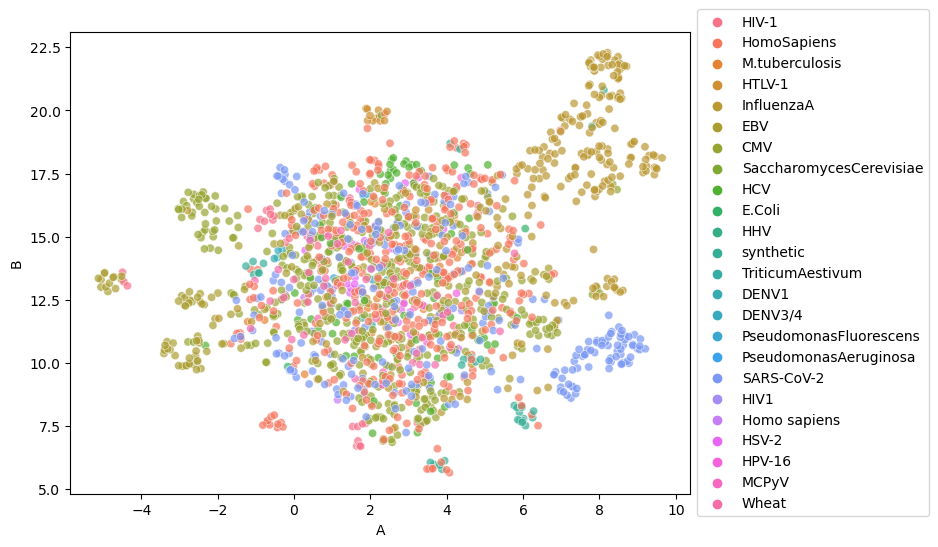

In [71]:
umap_2d = UMAP(n_neighbors = 170, n_components=2, random_state=0, min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_combine_homo)

combine_homo_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_combine = pd.concat([combine_homo_dist_df.reset_index(drop=True),clone_df_comb.reset_index(drop=True)], axis=1)

plot_combine_df_umap_homo = df_concat_combine[['antigen.species_x', 'A', 'B']]

#PLotting alpha chain umap
# fig_2d = px.scatter(
#     plot_combine_df_umap_homo, x='A', y='B',
#     color=plot_combine_df_umap_mouse['antigen.species_x'], labels={'color': 'species'}
# )
# fig_2d.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue='antigen.species_x', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


## Separating alpha and beta mouse

In [72]:
# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})


#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]


filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

#filter mouse
df_alpha_mouse = df_alpha[df_alpha['species'].isin(['MusMusculus'])]
df_beta_mouse = df_beta[df_beta['species'].isin(['MusMusculus'])]



In [73]:
df_beta_mouse

complex.id gene           cdr3_b_aa     v_b_gene    j_b_gene  \
1270          105  TRB       CASGGQGRAEQFF  TRBV13-2*01  TRBJ2-1*01   
1272          106  TRB      CTCSADRVGNTLYF     TRBV1*01  TRBJ1-3*01   
1276          108  TRB         CASGGGGTLYF  TRBV13-2*01  TRBJ2-4*01   
1280          110  TRB  CTCSAAPDWGASAETLYF     TRBV1*01  TRBJ2-3*01   
1284          112  TRB         CASGGGGTLYF  TRBV13-2*01  TRBJ2-4*01   
...           ...  ...                 ...          ...         ...   
80005       27103  TRB        CASSRANYEQYF  TRBV12-1*01  TRBJ2-7*01   
80007       27104  TRB        CASSRANYEQYF  TRBV12-1*01  TRBJ2-7*01   
80675       27247  TRB      CASASWGGYAEQFF  TRBV13-1*02  TRBJ2-1*01   
80677       27248  TRB      CASSRDWGPAEQFF     TRBV4*01  TRBJ2-1*01   
80680       27249  TRB     CASSLTDPLDSDYTF  TRBV12-2*01  TRBJ1-2*01   

           species   antigen.epitope    antigen.gene antigen.species  \
1270   MusMusculus  GNSHRGAIEWEGIESG  Ovotransferrin    GallusGallus   
1272   MusMusculus          INFDFNTI          Kctd20     MusMusculus   
1276   MusMusculus          SIYRYYGL       Synthetic       Synthetic   
1280   MusMusculus          KVITFIDL          Gtpbp1     MusMusculus   
1284   MusMusculus          EQYKFYSV          Ndufa4     MusMusculus   
...            ...               ...             ...             ...   
80005  MusMusculus          SIINFEKL             OVA    GallusGallus   
80007  MusMusculus          SIINFEKL             OVA    GallusGallus   
80675  MusMusculus        VVVGAVGVGK            KRAS     HomoSapiens   
80677  MusMusculus         VVGAVGVGK            KRAS     HomoSapiens   
80680  MusMusculus        VVVGADGVGK            KRAS     HomoSapiens   

       vdjdb.score  
1270             3  
1272             3  
1276             3  
1280             3  
1284             3  
...            ...  
80005            2  
80007            2  
80675            2  
80677            2  
80680            2  

[922 rows x 10 columns]

## Mouse alpha Chain

In [232]:
tr = TCRrep(cell_df = df_alpha_mouse, 
            organism = 'mouse', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_a = tr.clone_df

alpha_chain_mouse = tr.pw_alpha


#PCA
pca = PCA(n_components=50)
pca_alpha_mouse = pca.fit_transform(alpha_chain_mouse)
pca_alpha_mouse.shape


(899, 50)

In [75]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_mouse)


alpha_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_a_mouse = pd.concat([alpha_mouse_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_a_df_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()



In [76]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_mouse)

alpha_mouse_dist_df_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a_mouse = pd.concat([alpha_mouse_dist_df_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_umap_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_a_df_umap_mouse, x='A', y='B',
    color=plot_a_df_umap_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()


## Mouse Beta Chain

In [77]:
tr = TCRrep(cell_df = df_beta_mouse, 
            organism = 'mouse', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_b = tr.clone_df

beta_chain_mouse = tr.pw_beta


#PCA
pca = PCA(n_components=50)
pca_beta_mouse = pca.fit_transform(beta_chain_mouse)
pca_beta_mouse.shape

(922, 50)

In [78]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_beta_mouse)


beta_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_b_df_mouse['antigen.species'], labels={'color': 'species'},
    color_continuous_scale='plasma'
)
fig_2d.show()



In [79]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.99)
proj_2d = umap_2d.fit_transform(pca_beta_mouse)

beta_mouse_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_umap_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_b_df_umap_mouse, x='A', y='B',
    color=plot_b_df_umap_mouse['antigen.species'], labels={'color': 'species'}, title='UMAP mouse beta chain'
)
fig_2d.show()


## Mouse combined Chain

In [80]:
df_alpha_mouse 
df_beta_mouse 
df_merge_mouse = pd.merge(df_alpha_mouse, df_beta_mouse, on='complex.id')
df_merge_mouse.shape

(899, 21)

In [81]:
tr = TCRrep(cell_df = df_merge_mouse, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')


beta_chain_mouse = tr.pw_beta
alpha_chain_mouse = tr.pw_alpha
df_clone_comb_mouse = tr.clone_df

In [82]:
combine_chain_mouse = alpha_chain_mouse + beta_chain_mouse
combine_chain_mouse.shape

(899, 899)

## Task 5 Cluster Genes

Uhm... quite different. In PCA, you are given the multivariate continuous data (a multivariate vector for each subject), and you are trying to figure out if you don't need that many dimensions to conceptualize them. In (metric) MDS, you are given the matrix of distances between the objects, and you are trying to figure out what the locations of these objects in space are (and whether you need a 1D, 2D, 3D, etc. space). In non-metric MDS, you only know that objects 1 and 2 are more distant than objects 2 and 3, so you try to quantify that, on top of finding the dimensions and locations.



With a notable stretch of imagination, you can say that a common goal of PCA and MDS is to visualize objects in 2D or 3D. But given how different the inputs are, these methods won't be discussed as even distantly related in any multivariate textbook. I would guess that you can convert the data usable for PCA into data usable for MDS (say, by computing Mahalanobis distances between objects, using the sample covariance matrix), but that would immediately result in a loss of information: MDS is only defined up to location and rotation, and the latter two can be done more informatively with PCA.


https://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/132731#132731

https://scikit-learn.org/stable/modules/clustering.html

**Select Allogramative or K means**


**Fine tune them**

The purpose of this process is to reduce the number of features under consideration, where each feature is a dimension that partly represents the objects.
Why is dimensionality reduction important? As more features are added, the data becomes very sparse and analysis suffers from the curse of dimensionality. Additionally, it is easier to process smaller data sets.

https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/

linear assumption of PCA: https://datascience.stackexchange.com/questions/93734/can-someone-clarify-what-the-linear-assumption-of-pca-ism

We all know that KMeans is great, but it does not work well with higher dimension data. Thanks to Curse of Dimensionality :( as the dimensions increase the distances between different data points tend to be close together and this is a huge problem especially when you are dealing with algorithms like KMeans that uses distance-based metrics to identify similar points for clustering. We can either reduce the number of features by:

a) By dropping features that are very similar to each other and keeping just one out of the two.

b) By combining features that represent more sensible information when considered together.

and if you cannot afford to do either of the two or even after applying them, the dimensions are a mess we then can

c) Use any of the several available dimensionality reduction techniques.

https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240


No need to scale down the distance matrix since it is not a common practice

In [83]:
pca = PCA(n_components=2)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 2)

Select cluster algorithm here
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## K-means Implementation

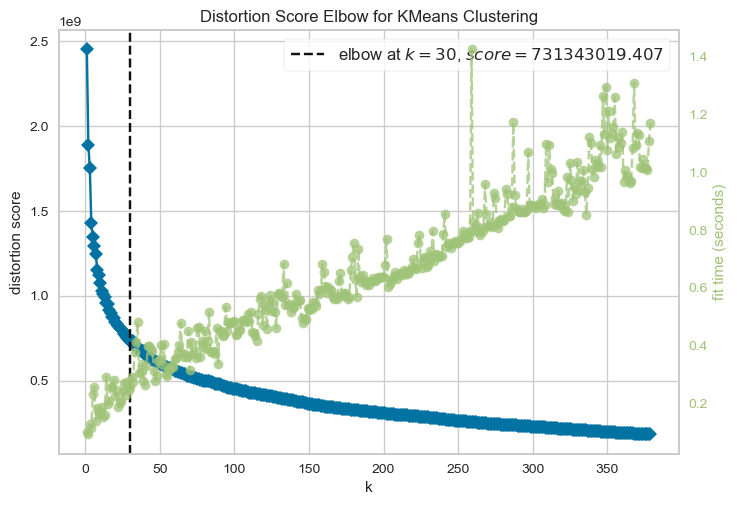

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=379, random_state=20), k=(1, 380))

In [84]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), alpha_chain, k=(1,380))

Optimal K for K-means clustering is: 30

In [85]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 30, random_state = 0, n_init='auto')
kmeans.fit(alpha_chain)

KMeans(n_clusters=30, random_state=0)

In [86]:
kmeans.cluster_centers_.shape

(30, 1913)

In [87]:
kmeans.inertia_

722634159.759104

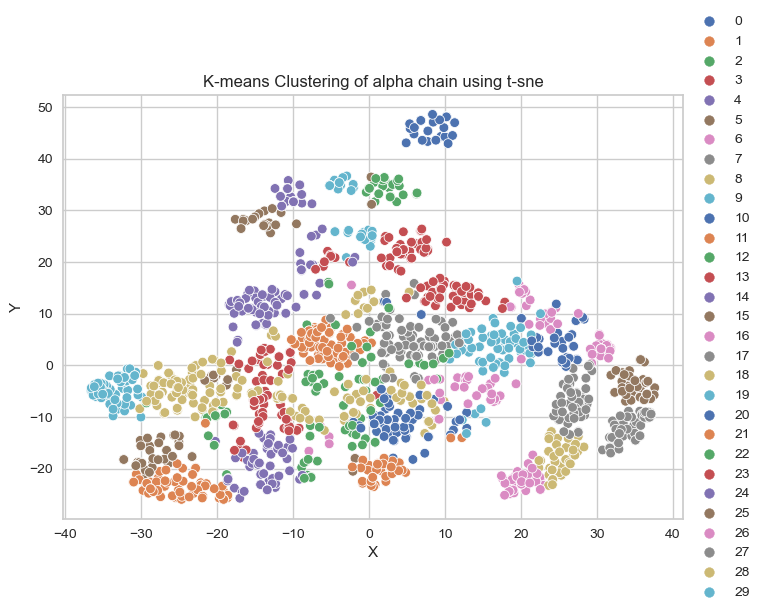

In [88]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [89]:
labels = kmeans.labels_
metrics.silhouette_score(alpha_chain, labels, metric='euclidean')

0.21922223872011712

In [90]:
#calinski harabasz
labels = kmeans.labels_
metrics.calinski_harabasz_score(alpha_chain, labels)

155.3750165325618

## K-means for combined chain human

In [241]:
combined_distance_mt_homo.shape

(1840, 1840)

this is the smaller distance value

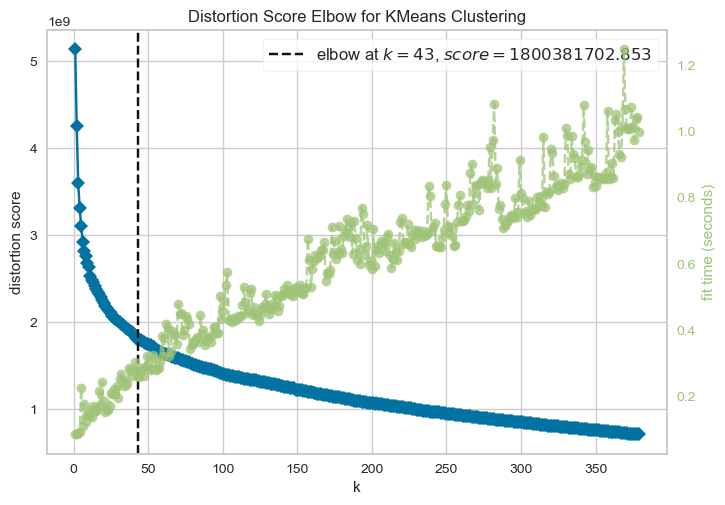

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=379, random_state=20), k=(1, 380))

In [92]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), combined_distance_mt_homo, k=(1,380))

In [242]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 43, random_state = 0, n_init='auto')
kmeans.fit(combined_distance_mt_homo)
kmeans.labels_

array([21,  5, 37, ..., 16, 30, 39], dtype=int32)

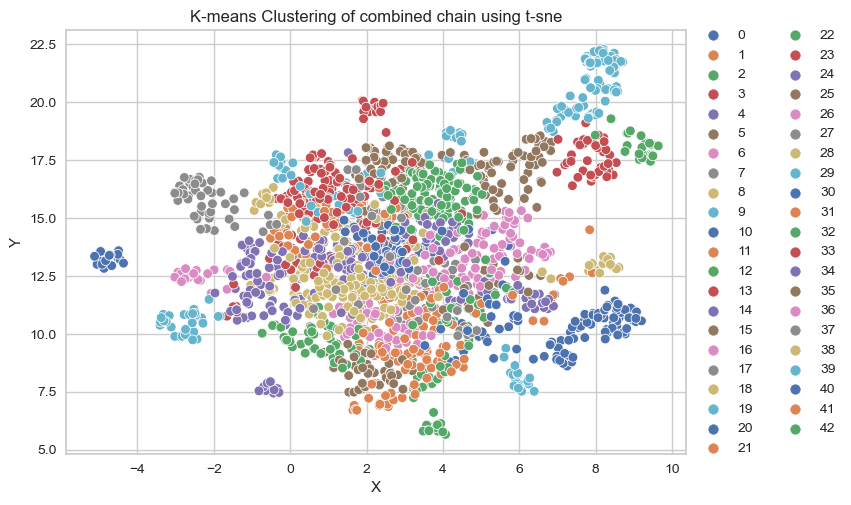

In [243]:

sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of combined chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Set ncol=2 for two columns

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [244]:
def purity_score(y_true, y_pred):
    """Purity score

    To compute purity, each cluster is assigned to the class which is most frequent 
    in the cluster [1], and then the accuracy of this assignment is measured by counting 
    the number of correctly assigned documents and dividing by the number of documents.
    We suppose here that the ground truth labels are integers, the same with the predicted clusters i.e
    the clusters index.

    Args:
        y_true(np.ndarray): n*1 matrix Ground truth labels
        y_pred(np.ndarray): n*1 matrix Predicted clusters
    
    Returns:
        float: Purity score
    
    References:
        [1] https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
    """
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner
    
    return accuracy_score(y_true, y_voted_labels)

## Purity score

In [245]:
y_true = plot_combine_df_homo['antigen.species_x']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true) 

In [246]:
kmeans.labels_

array([21,  5, 37, ..., 16, 30, 39], dtype=int32)

In [256]:
#purity score
print("purity score:", purity_score(y_true, kmeans.labels_)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combined_distance_mt_homo,
                               kmeans.labels_, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combined_distance_mt_homo, kmeans.labels_))

dbi_score = davies_bouldin_score(combined_distance_mt_homo, kmeans.labels_)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, kmeans.labels_)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



purity score: 0.48695652173913045
Silhouette score: 0.15927751206029617
Calinski harabasz score: 78.52500887850348
Davies-Bouldin Index: 2.153943784855464
Fowlkes-Mallows Index: 0.1400572739409563


# K-means mouse combined

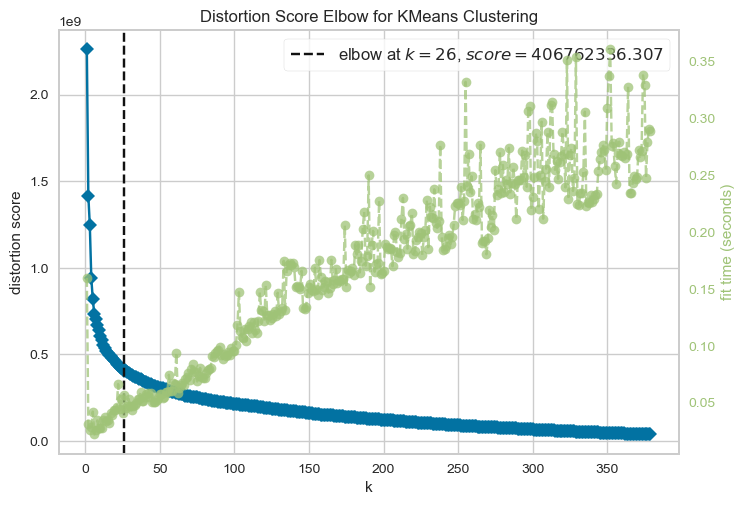

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=379, random_state=20), k=(1, 380))

In [263]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), combine_chain_mouse, k=(1,380))

In [273]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 26, random_state = 0, n_init='auto')
kmeans.fit(combine_chain_mouse)

KMeans(n_clusters=26, random_state=0)

In [272]:
label_mouse = kmeans.labels_
label_mouse.shape

(899,)

In [265]:
y_true = df_clone_comb_mouse['antigen.species_x']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true) 

In [277]:
#purity score
print("purity score:", purity_score(y_true, kmeans.labels_)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combine_chain_mouse,
                               kmeans.labels_, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combine_chain_mouse, kmeans.labels_))

dbi_score = davies_bouldin_score(combine_chain_mouse, kmeans.labels_)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, kmeans.labels_)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



purity score: 0.7997775305895439
Silhouette score: 0.22968079928594726
Calinski harabasz score: 156.1185368151918
Davies-Bouldin Index: 1.6713622348780062
Fowlkes-Mallows Index: 0.24187814858615686


## Hierachrichal Clustering

Note that agglomerative clustering is good at identifying small clusters. Divisive hierarchical clustering is good at identifying large clusters. top down approach

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

In [99]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

In [100]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=30,metric='precomputed', linkage='complete')

label=hierarchical_cluster.fit_predict(alpha_chain)

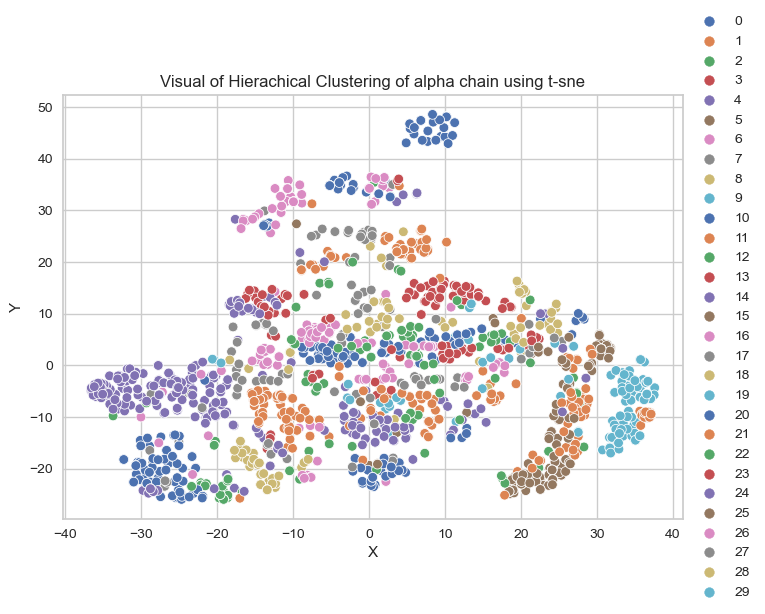

In [101]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=label, palette='deep' )
plt.title('Visual of Hierachical Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

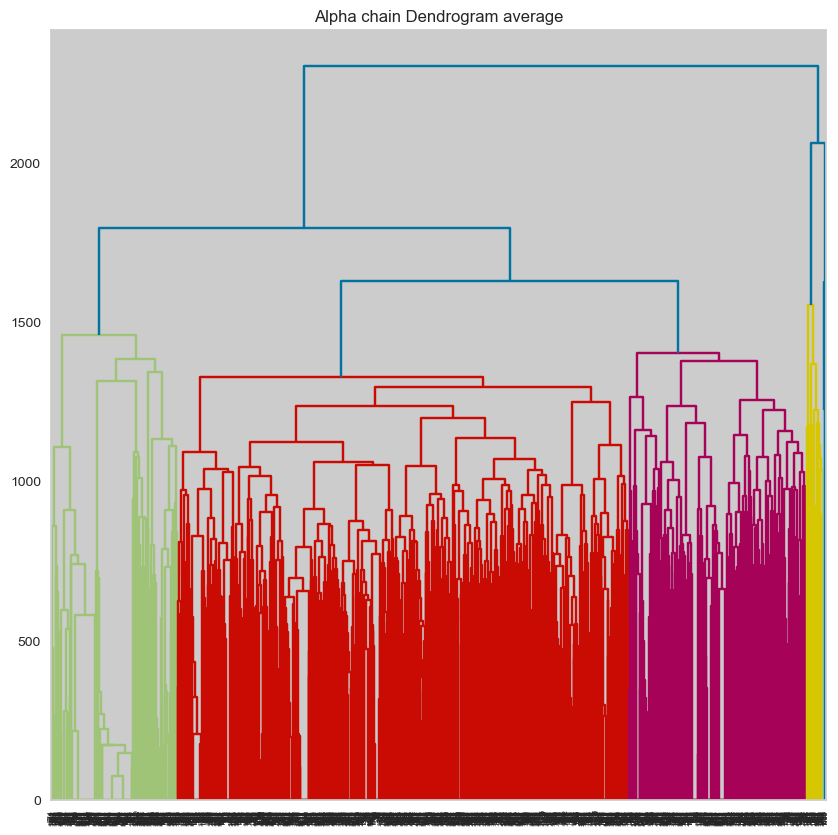

In [102]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Alpha chain Dendrogram average")

selected_data = alpha_chain
clusters = shc.linkage(selected_data, 
            method='average', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

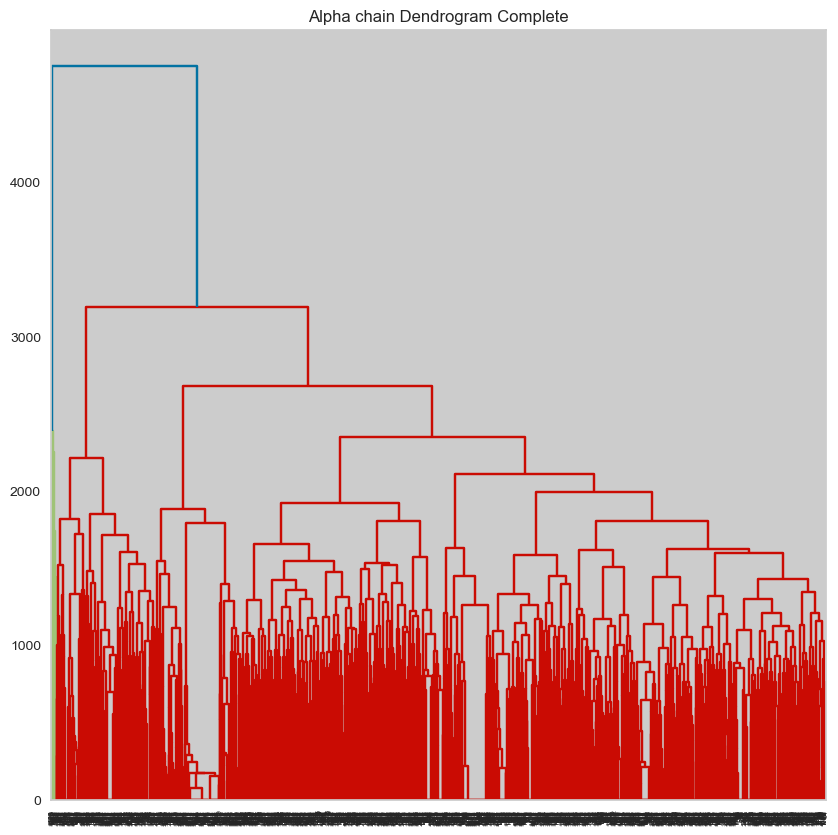

In [103]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Alpha chain Dendrogram Complete")

selected_data = alpha_chain
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [104]:
cluster_label = cut_tree(clusters, n_clusters=3).reshape(-1,)
labels = cluster_label

In [257]:
#calinski harabasz
print("calinski_harabasz_score:", metrics.calinski_harabasz_score(alpha_chain, cluster_label))
print("silhouette_score :", metrics.silhouette_score(alpha_chain, cluster_label, metric='euclidean'))
print("purity score:", purity_score(y_true, kmeans.labels_))


ValueError: Found input variables with inconsistent numbers of samples: [1913, 1840]

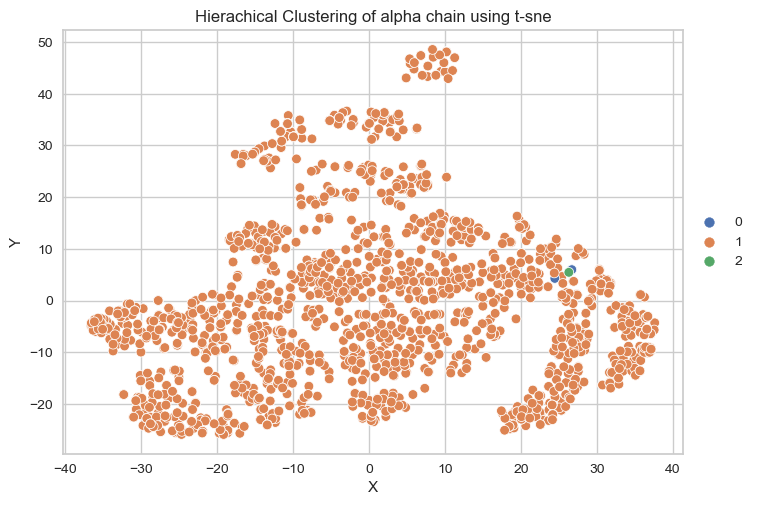

In [106]:
#perform actual clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3,metric='precomputed', linkage='average')

label=hierarchical_cluster.fit_predict(alpha_chain)


sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=label, palette='deep' )
plt.title('Hierachical Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Hierarchy for combined chian

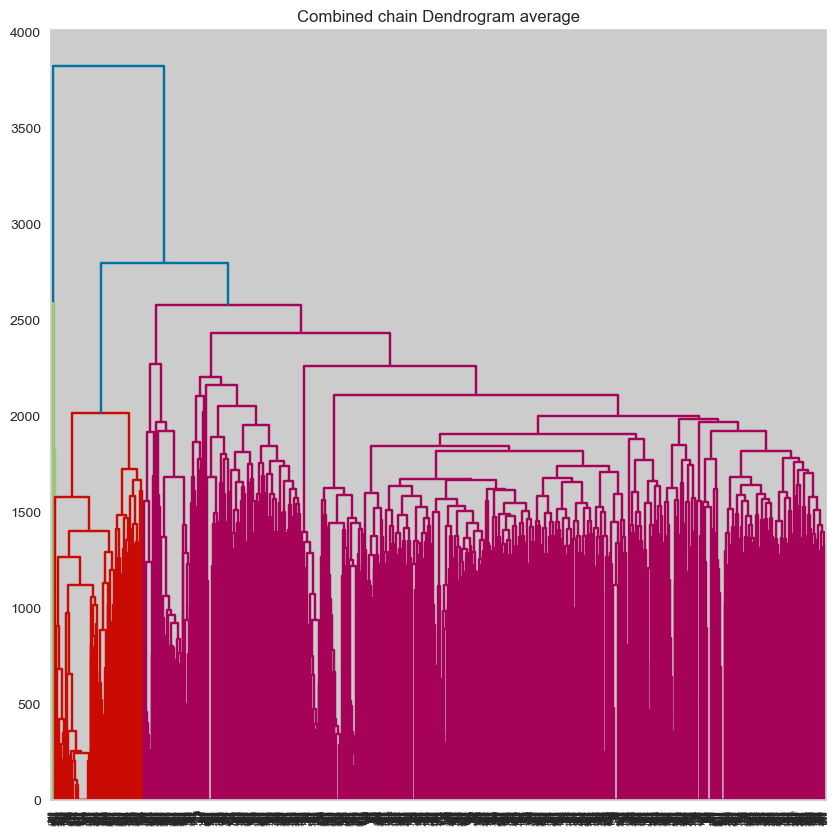

In [108]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Combined chain Dendrogram average")

selected_data = combined_distance_mt_homo
clusters = shc.linkage(selected_data, 
            method='average', 
            )
shc.dendrogram(Z=clusters)
plt.show()

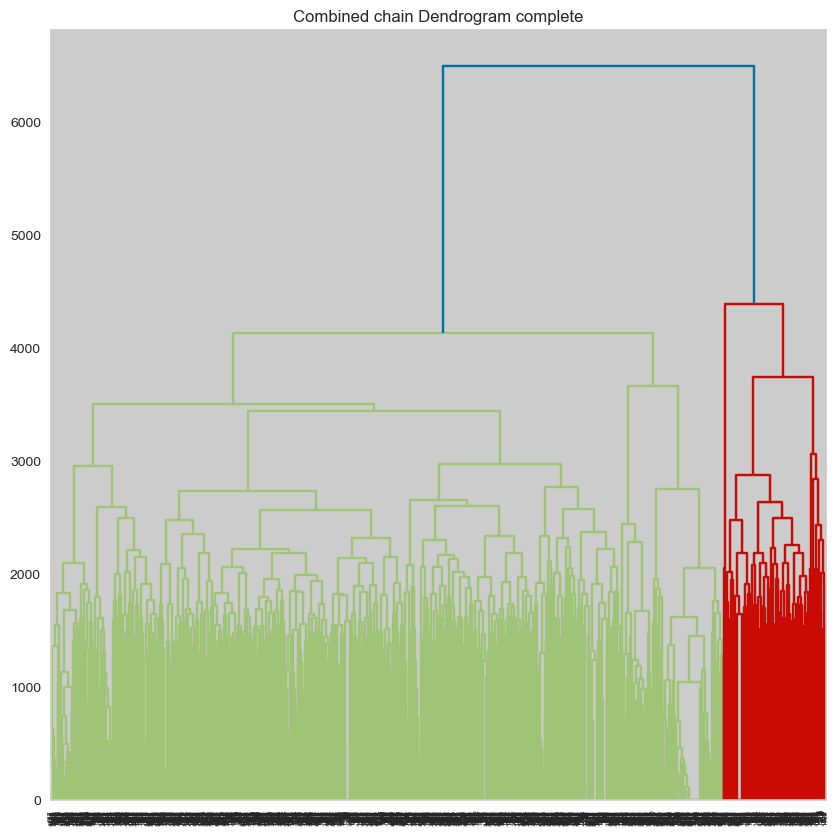

In [109]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Combined chain Dendrogram complete")

selected_data = combined_distance_mt_homo
clusters = shc.linkage(selected_data, 
            method='complete')
shc.dendrogram(Z=clusters)
plt.show()

In [259]:
cluster_label = cut_tree(clusters, n_clusters=8).reshape(-1,)

cluster_label.shape




array([0, 0, 1, ..., 1, 1, 3])

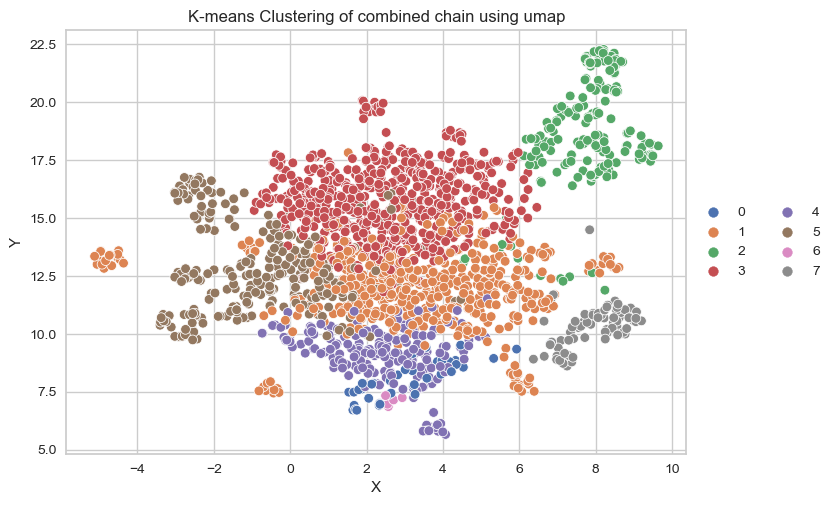

In [111]:

sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=cluster_label, palette='deep', )
plt.title('K-means Clustering of combined chain using umap')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # Set ncol=2 for two columns

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [260]:
#purity score
purity_score(y_true, cluster_label)

#purity score
print("purity score:", purity_score(y_true, cluster_label)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combined_distance_mt_homo,
                               cluster_label, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combined_distance_mt_homo, cluster_label))

dbi_score = davies_bouldin_score(combined_distance_mt_homo, cluster_label)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, cluster_label)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



purity score: 0.39402173913043476
Silhouette score: 0.11726488729956805
Calinski harabasz score: 186.28963662102385
Davies-Bouldin Index: 2.120251777204465
Fowlkes-Mallows Index: 0.24379985355284334


## Hierarchical for mouse combined

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


fig, axs=plt.subplots(2,2, figsize=(15, 15))
metrics=['single', 'average', 'complete',  'centroid']
for i in range(2):
    for j in range(2):
        linked=linkage(X, metrics[(i*2)+j])
        dendrogram(linked, ax=axs[i,j])
        axs[i,j].set_title(metrics[(i*2)+j])

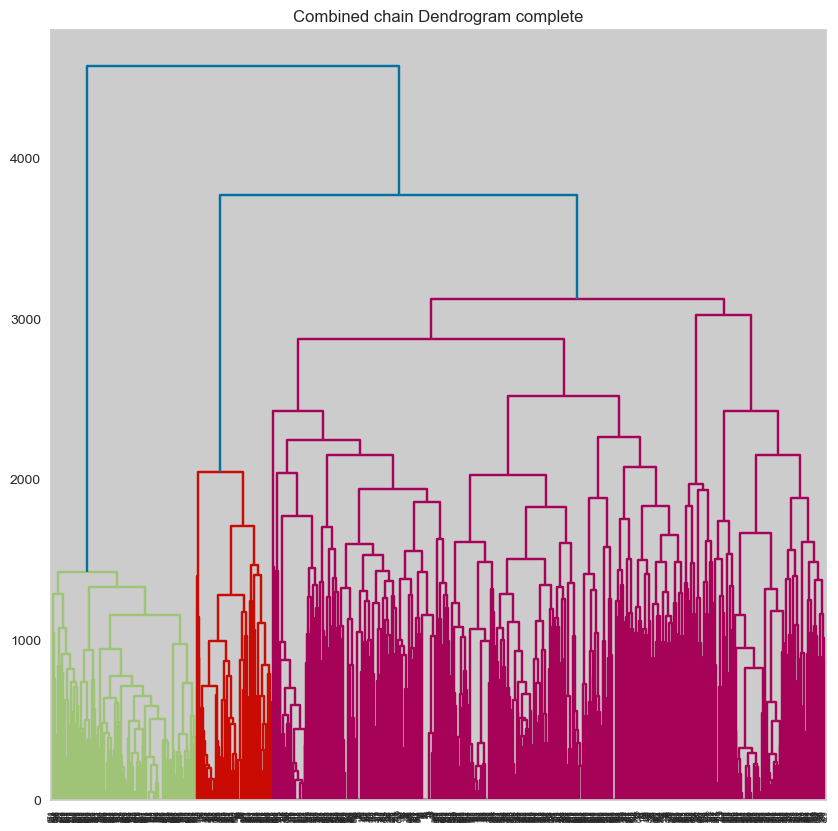

In [280]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 10), facecolor='white')  # Set the background color to white
plt.title("Combined chain Dendrogram complete")

selected_data = combine_chain_mouse
clusters = linkage(selected_data, method='complete')
dendrogram(clusters)
plt.show()


In [281]:
cluster_label = cut_tree(clusters, n_clusters=8).reshape(-1,)

cluster_label.shape

(899,)

In [282]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=6,metric='precomputed', linkage='average')

label=hierarchical_cluster.fit_predict(combine_chain_mouse)

In [284]:
#purity score
print("purity score:", purity_score(y_true, label)) # from 0 to 1, moderate cluster quality
print("Silhouette score:", 
      metrics.silhouette_score(combine_chain_mouse,
                               label, metric='euclidean')) # from -1 to 1, week cluster quality
print("Calinski harabasz score:", metrics.calinski_harabasz_score(combine_chain_mouse, label))

dbi_score = davies_bouldin_score(combine_chain_mouse, label)
print("Davies-Bouldin Index:", dbi_score) #lower better
fmi_score = fowlkes_mallows_score(y_true, label)
print("Fowlkes-Mallows Index:", fmi_score) #The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.



purity score: 0.7274749721913237
Silhouette score: 0.013002897029773157
Calinski harabasz score: 46.21165845016181
Davies-Bouldin Index: 1.4958385211786742
Fowlkes-Mallows Index: 0.6769477202704304


## DBSCAN Clustering

Selecting optimal k value

https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/#ii_Minimum_Points_minPts

In [113]:
# pip install kneed
alpha_chain

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

Text(0, 0.5, 'Distance')

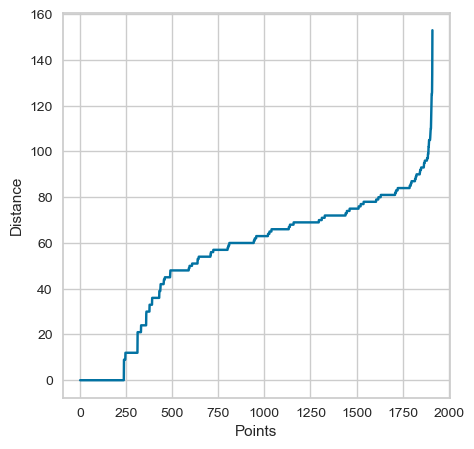

In [114]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11, metric='precomputed')
neighbors = nearest_neighbors.fit(alpha_chain)

distances, indices = neighbors.kneighbors(alpha_chain)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")


84.0


<Figure size 500x500 with 0 Axes>

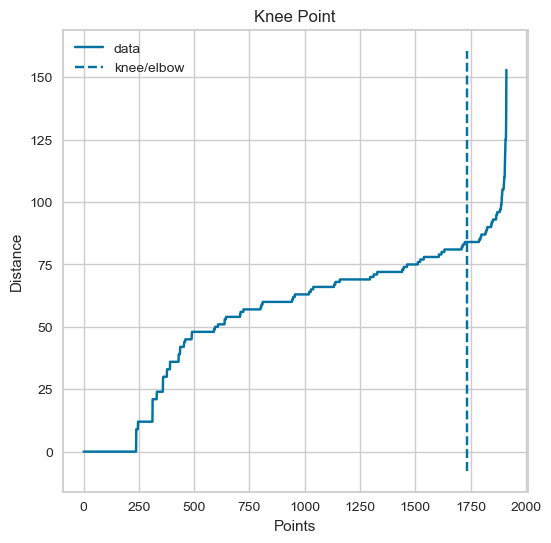

In [115]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [116]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=55
, min_samples=11, metric = 'precomputed')
dbscan_cluster.fit(alpha_chain)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


Estimated no. of clusters: 15
Estimated no. of noise points: 886


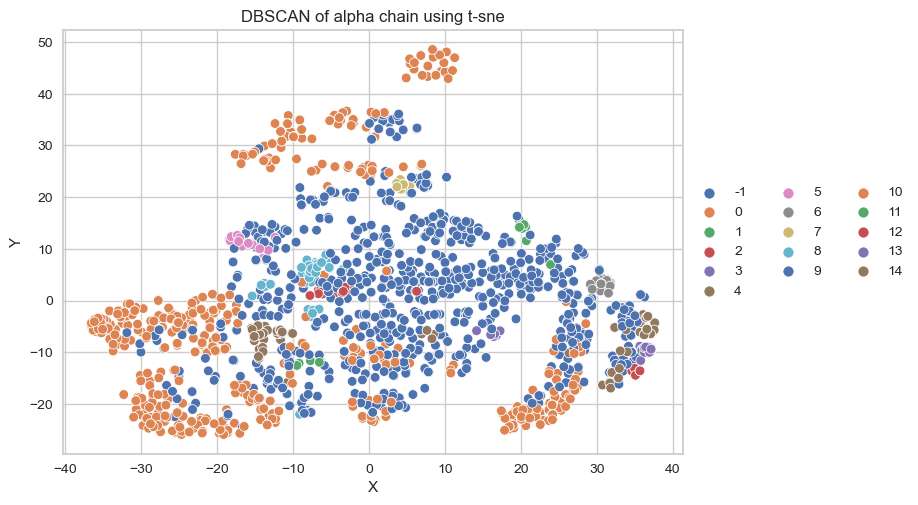

In [117]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=dbscan_cluster.labels_, palette='deep' )
plt.title('DBSCAN of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Combined Chain DBScan

In [118]:
combined_distance_mt_homo.shape

(1840, 1840)

Text(0, 0.5, 'Distance')

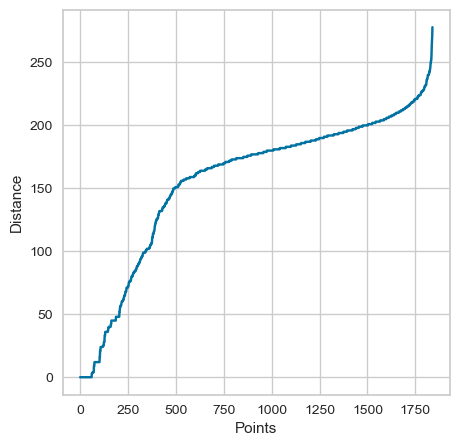

In [119]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11, metric='precomputed')
neighbors = nearest_neighbors.fit(combined_distance_mt_homo)

distances, indices = neighbors.kneighbors(combined_distance_mt_homo)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

214.0


<Figure size 500x500 with 0 Axes>

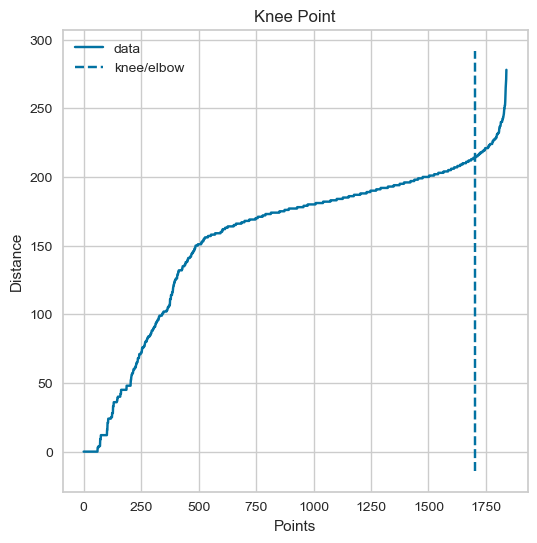

In [120]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [121]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=100, min_samples=10, metric='precomputed')
dbscan_cluster.fit(combined_distance_mt_homo)

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


Estimated no. of clusters: 15
Estimated no. of noise points: 1410


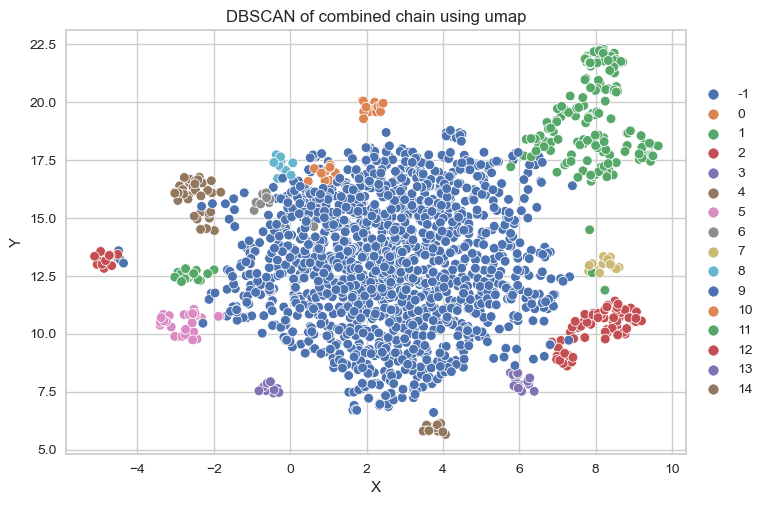

In [122]:
sns.scatterplot(data=plot_combine_df_umap_homo, x='A', y='B', hue=dbscan_cluster.labels_, palette='deep' )
plt.title('DBSCAN of combined chain using umap')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluation of the clusters

In [123]:
labels = dbscan_cluster.labels_
metrics.silhouette_score(combined_distance_mt_homo, labels)

0.0007586909359137581

In [124]:
from sklearn import metrics

#calinski harabasz
labels = kmeans.labels_
metrics.calinski_harabasz_score(combined_distance_mt_homo, labels)

78.52500887850348

In [125]:
purity_score(y_true, labels)

0.48695652173913045

The model did not perform the clustering well on the dataset based on specificity. The reason could be that the data is sprase with manty variable of the CDR3 sequences.

## Task 6. Prediction based on specificity

### K Nearest Neighbor alpha chain

In [126]:
df_alpha_homo=pd.DataFrame(alpha_chain)
df_alpha_homo['antigen.epitope'] = clone_df['antigen.epitope']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=df_alpha_homo.iloc[:, :-1]
y=df_alpha_homo[['antigen.epitope']]


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance']
}

 
knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=14)
#fit model to data
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   random_state=14, scoring='accuracy')

In [129]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 1, 'n_neighbors': 13}
0.5117647058823529


In [130]:
y_knn_pred = knn_cv.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("accuracy:",accuracy_score(y_test, y_knn_pred))



accuracy: 0.4934725848563969


## KNN on Combined Chain

In [133]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df=pd.DataFrame(combined_distance_mt_homo)
combined_pw_distance_homo_df['antigen.epitope'] = clone_df_comb['antigen.epitope_x']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=combined_pw_distance_homo_df.iloc[:, :-1]
y=combined_pw_distance_homo_df[['antigen.epitope']]

# enc = LabelEncoder().fit(y)
# y=enc.transform(y)

In [134]:
combined_distance_mt_homo.shape

(1840, 1840)

## Normal Train Test Split

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [136]:
# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [137]:
X_train.shape

(1472, 1840)

In [138]:
# X_train, X_test, y_train, y_test, train_ix, test_ix = train_test_split(X, y, indices, random_state=1792)

Accuracy shows 0 for some epitope could be that because it has multiple target binded to cdr3 sequence, the t-cell.

Accuracy score is 0.5

In [139]:
# plt.figure(figsize = (10,10))

# sns.heatmap(cm, annot=True)
# plt.show()

## Multi learn KNN
https://stackoverflow.com/questions/57901145/multilabel-classification-ml-knn-vs-knn

## Precomputed SVM

In [ ]:
# X_train.shape

In [ ]:
# from sklearn import svm
# import sklearn.model_selection as model_selection
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

# clf = svm.SVC(kernel='precomputed', gamma=0.5, C=0.1 ).fit(X_train, y_train)


In [ ]:
# y_pred = clf.predict(X_test)


In [ ]:
# svm_accuracy = accuracy_score(y_test, y_pred)
# svm_f1 = f1_score(y_test, y_pred, average='weighted')
# print('Precomp Kernel): ', "%.2f" % (svm_accuracy*100))
# print('Precomp Kernel): ', "%.2f" % (svm_f1*100))


In [ ]:
# #convert to array
# X_train= X_train_pre.values
# X_test = X_test_pre.values
# y_train_array = y_train.values

In [ ]:
# from sklearn import svm
# from sklearn.model_selection import RandomizedSearchCV

# # Define the SVM classifier without the extra .SVC
# clf = svm.SVC(kernel='precomputed')

# params = {'C': [0.1, 1, 10, 100, 1000],
#           'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
#          }
 
# svm_clf = RandomizedSearchCV(clf, params, cv=cv, scoring='accuracy', random_state=14)
# svm_clf.fit(X_train, y_train)

In [ ]:
# print(svm_clf.best_params_)
# print(svm_clf.best_score_)

In [ ]:
# X_test.shape

In [ ]:
# clf = MultiOutputClassifier(svm.SVC(kernel='precomputed')).fit(X_train, y_train)
# y_pred_svm = clf.predict(X_test)
# print(classification_report(y_pred_svm, y_test))

In [ ]:
# y_pred_svm.shape

In [ ]:
# print(classification_report(y_pred_svm, y_test))

# Multi-label classificaton  kNN

In [148]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df=pd.DataFrame(combined_distance_mt_homo)
combined_pw_distance_homo_df['antigen.epitope'] = clone_df_comb['antigen.epitope_x']
# df_alpha_homo['cdr3_a_aa'] = clone_df['cdr3_a_aa']

X=combined_pw_distance_homo_df.iloc[:, :-1]
y=combined_pw_distance_homo_df[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


In [149]:
# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, 
                                                                    test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=KNeighborsClassifier(metric='precomputed'),
                   param_distributions={'metric': ['precomputed'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['distance']},
                   random_state=1792, scoring='accuracy')

In [151]:
print(knn_cv.best_params_)
from skmultilearn.problem_transform import ClassifierChain
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.5135548814120243


In [152]:

from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=3, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [153]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred_pre, average='weighted'))


Accuracy score: 0.5842391304347826
Precision score: 0.5626799830604179
Recall score: 0.5842391304347826
f1 score: 0.564416991233682


In [154]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred_pre)
print(cm)

[[[366   0]
  [  1   1]]

 [[365   0]
  [  3   0]]

 [[367   0]
  [  1   0]]

 ...

 [[368   0]
  [  0   0]]

 [[367   1]
  [  0   0]]

 [[368   0]
  [  0   0]]]


## VDJDB score with value 2 and 3

In [155]:
tr = TCRrep(cell_df = df_filtered, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

# tr.clone_df.shape
# tr.clone_df.head(5)
clone_df_comb =tr.clone_df
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)
print("clone shape", clone_df_comb.shape)

alpha shape: (1156, 1156)
beta shape (1156, 1156)
clone shape (1156, 26)


In [156]:
combined_pw_distance_homo = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa
combined_distance_mt_homo_2 = tr.pw_beta + tr.pw_alpha


In [157]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_df2=pd.DataFrame(combined_distance_mt_homo_2)
combined_pw_distance_homo_df2['antigen.epitope'] = clone_df_comb['antigen.epitope_x']

X=combined_pw_distance_homo_df2.iloc[:, :-1]
y=combined_pw_distance_homo_df2[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=KNeighborsClassifier(metric='precomputed'),
                   param_distributions={'metric': ['precomputed'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['distance']},
                   random_state=1792, scoring='accuracy')

In [159]:
print(knn_cv.best_params_)
from skmultilearn.problem_transform import ClassifierChain
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.4665147265077139


In [160]:

from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [161]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='macro'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='macro'))
print('F1 score:', f1_score(y_test, y_pred_pre, average='weighted'))


Accuracy score: 0.5129310344827587
Precision score: 0.09565026289164219
Recall score: 0.10456872245490131
Recall score: 0.49534363735292114


## Mouse dataset combine

In [200]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_mouse=pd.DataFrame(combine_chain_mouse)
combined_pw_distance_homo_mouse['antigen.epitope'] = df_clone_comb_mouse['antigen.epitope_x']

X=combined_pw_distance_homo_mouse.iloc[:, :-1]
y=combined_pw_distance_homo_mouse[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=KNeighborsClassifier(metric='precomputed'),
                   param_distributions={'metric': ['precomputed'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['distance']},
                   random_state=1792, scoring='accuracy')

In [202]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.764866979655712


In [203]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [204]:
y_pred_pre = knn_cv.predict(X_test_pre)

In [205]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

Accuracy score: 0.7055555555555556
Precision score: 0.7018652336413492
Recall score: 0.7055555555555556
Recall score: 0.699129765143697


## Human alpha chain

In [221]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_a=pd.DataFrame(alpha_chain)
combined_pw_distance_homo_a['antigen.epitope'] = clone_df_human_a['antigen.epitope']

X=combined_pw_distance_homo_a.iloc[:, :-1]
y=combined_pw_distance_homo_a[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=KNeighborsClassifier(metric='precomputed'),
                   param_distributions={'metric': ['precomputed'],
                                        'n_neighbors': range(1, 30),
                                        'p': [1, 2, 3],
                                        'weights': ['distance']},
                   random_state=1792, scoring='accuracy')

In [223]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.469281045751634


In [224]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [225]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

Accuracy score: 0.46736292428198434
Precision score: 0.4861631810080024
Recall score: 0.46736292428198434
Recall score: 0.4659133386995529


# Beta chain human

In [228]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_homo_b=pd.DataFrame(beta_chain_human)
combined_pw_distance_homo_b['antigen.epitope'] = clone_df_human_b['antigen.epitope']

X=combined_pw_distance_homo_b.iloc[:, :-1]
y=combined_pw_distance_homo_b[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.4877419354838709


In [230]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [231]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

Accuracy score: 0.5335051546391752
Precision score: 0.5714082998548152
Recall score: 0.5335051546391752
Recall score: 0.5387995951118009


## Alpha mouse 

In [233]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_mouse_a=pd.DataFrame(alpha_chain_mouse)
combined_pw_distance_mouse_a['antigen.epitope'] = clone_df_mouse_a['antigen.epitope']

X=combined_pw_distance_mouse_a.iloc[:, :-1]
y=combined_pw_distance_mouse_a[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.6689749608763693


In [235]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [236]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('f1 score:', f1_score(y_test, y_pred_pre, average='weighted'))

Accuracy score: 0.6666666666666666
Precision score: 0.6931863929146538
Recall score: 0.6666666666666666
Recall score: 0.6602046783625731


## Beta mouse

In [237]:
from sklearn.preprocessing import LabelEncoder

combined_pw_distance_mouse_b=pd.DataFrame(beta_chain_mouse)
combined_pw_distance_mouse_b['antigen.epitope'] = clone_df_mouse_b['antigen.epitope']

X=combined_pw_distance_mouse_b.iloc[:, :-1]
y=combined_pw_distance_mouse_b[['antigen.epitope']]


y.reset_index(inplace=True)
y.rename(columns={'index': 'Index'}, inplace=True)

multi_label_df = pd.crosstab(index=y['Index'], columns=y['antigen.epitope'])
multi_label_df.reset_index(inplace=True)

# Replace all non-zero values with 1 (as they may be counted multiple times)
multi_label_df.iloc[:, 1:] = multi_label_df.iloc[:, 1:].clip(upper=1)

y = multi_label_df.drop(columns=['Index'], axis=1)


# Create indices for train-test split
indices = range(len(X))
X_train_indices, X_test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=1792)

# Subset the distance matrix based on the indices
X_train_pre = X.iloc[X_train_indices, X_train_indices]
X_test_pre = X.iloc[X_test_indices, X_train_indices]

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

cv= KFold(n_splits=10,random_state=15, shuffle=True)


knn2 = KNeighborsClassifier()
#Creating a dictionary of neighbours 
params = {
    'n_neighbors': range(1, 30),
    'p': [1, 2, 3],
    'weights': ['distance'],
    'metric': ['precomputed'] 
         }

knn2 = KNeighborsClassifier(metric='precomputed')

#convert to array
X_train= X_train_pre.values
X_test = X_test_pre.values
y_train_array = y_train.values

knn_cv = RandomizedSearchCV(knn2, params, cv=cv, scoring='accuracy', random_state=1792)
#fit model to data
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 1, 'metric': 'precomputed'}
0.2851917057902974


In [239]:
from skmultilearn.problem_transform import BinaryRelevance

clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=1, weights='distance', 
                                                 p=2, metric='precomputed')).fit(X_train, y_train)

clf.score(X_test, y_test)

y_pred_pre = clf.predict(X_test)

In [240]:
print('Accuracy score:', accuracy_score(y_test, y_pred_pre))
print('Precision score:', precision_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', recall_score(y_test, y_pred_pre, average='weighted'))
print('Recall score:', f1_score(y_test, y_pred_pre, average='weighted'))

Accuracy score: 0.2222222222222222
Precision score: 0.2248258809696718
Recall score: 0.2222222222222222
Recall score: 0.22225477163095636
